In [22]:
import numpy as np
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

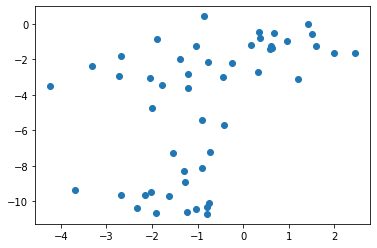

In [23]:
X1, y1 = make_blobs(n_samples=50, cluster_std=0.99, random_state=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

In [24]:
agglom = AgglomerativeClustering(n_clusters=3, linkage='average')

In [25]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=3)

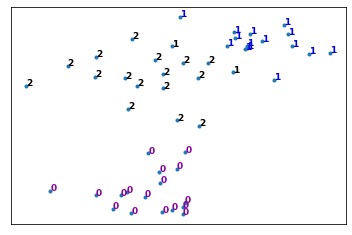

In [28]:
plt.figure(figsize=(6, 4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)
# num: y1
# color: agglom labels
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

plt.xticks([])
plt.yticks([])
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [29]:
distance_mat = distance_matrix(X1, X1)
print(distance_mat)

[[0.         0.34052228 0.35191179 ... 0.18644375 0.6272403  0.20465766]
 [0.34052228 0.         0.10249969 ... 0.46059776 0.62826008 0.14719489]
 [0.35191179 0.10249969 0.         ... 0.4311806  0.7264086  0.20008261]
 ...
 [0.18644375 0.46059776 0.4311806  ... 0.         0.80978334 0.35631945]
 [0.6272403  0.62826008 0.7264086  ... 0.80978334 0.         0.56145478]
 [0.20465766 0.14719489 0.20008261 ... 0.35631945 0.56145478 0.        ]]


C:\Users\AMIRH~1.DAL\AppData\Local\Temp/ipykernel_3368/1271877938.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(distance_mat, 'complete')


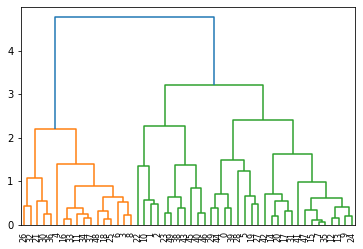

In [30]:
z = hierarchy.linkage(distance_mat, 'complete')
dendro = hierarchy.dendrogram(z)